In [1]:
import gym
import pandas as pd
import random


In [5]:
from IPython.display import Javascript


In [2]:
env = gym.make('FrozenLake-v0')

In [3]:
Q = {}
for s in range(env.observation_space.n):
  for a in range(env.action_space.n):
    Q[(s,a)] = 0.0

In [6]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

Q

<IPython.core.display.Javascript object>

{(0, 0): 0.0,
 (0, 1): 0.0,
 (0, 2): 0.0,
 (0, 3): 0.0,
 (1, 0): 0.0,
 (1, 1): 0.0,
 (1, 2): 0.0,
 (1, 3): 0.0,
 (2, 0): 0.0,
 (2, 1): 0.0,
 (2, 2): 0.0,
 (2, 3): 0.0,
 (3, 0): 0.0,
 (3, 1): 0.0,
 (3, 2): 0.0,
 (3, 3): 0.0,
 (4, 0): 0.0,
 (4, 1): 0.0,
 (4, 2): 0.0,
 (4, 3): 0.0,
 (5, 0): 0.0,
 (5, 1): 0.0,
 (5, 2): 0.0,
 (5, 3): 0.0,
 (6, 0): 0.0,
 (6, 1): 0.0,
 (6, 2): 0.0,
 (6, 3): 0.0,
 (7, 0): 0.0,
 (7, 1): 0.0,
 (7, 2): 0.0,
 (7, 3): 0.0,
 (8, 0): 0.0,
 (8, 1): 0.0,
 (8, 2): 0.0,
 (8, 3): 0.0,
 (9, 0): 0.0,
 (9, 1): 0.0,
 (9, 2): 0.0,
 (9, 3): 0.0,
 (10, 0): 0.0,
 (10, 1): 0.0,
 (10, 2): 0.0,
 (10, 3): 0.0,
 (11, 0): 0.0,
 (11, 1): 0.0,
 (11, 2): 0.0,
 (11, 3): 0.0,
 (12, 0): 0.0,
 (12, 1): 0.0,
 (12, 2): 0.0,
 (12, 3): 0.0,
 (13, 0): 0.0,
 (13, 1): 0.0,
 (13, 2): 0.0,
 (13, 3): 0.0,
 (14, 0): 0.0,
 (14, 1): 0.0,
 (14, 2): 0.0,
 (14, 3): 0.0,
 (15, 0): 0.0,
 (15, 1): 0.0,
 (15, 2): 0.0,
 (15, 3): 0.0}

In [7]:
def epsilon_greedy(state, epsilon):
    if random.uniform(0,1) < epsilon:
        return env.action_space.sample()
    else:
        return max(list(range(env.action_space.n)), key = lambda x: Q[(state,x)])

In [8]:
alpha = 0.85
gamma = 0.90
epsilon = 0.8

In [9]:
num_episodes = 5000
num_timesteps = 1000

> SARSA Update rule

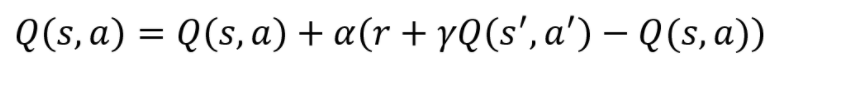

In [10]:
for i in range(num_episodes):

  s = env.reset()
  a = epsilon_greedy(s, epsilon)

  for t in range(num_timesteps):

    s_, r, done, _ =env.step(a)
    a_ =epsilon_greedy(s_, epsilon)

    # Now computing the Q value of state-action pair
    Q[(s,a)] += alpha * (r + gamma*Q[(s_,a_)] - Q[(s,a)])

    s = s_
    a = a_

    if done:
      break



In [12]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

Q

<IPython.core.display.Javascript object>

{(0, 0): 5.9410821802972436e-05,
 (0, 1): 0.0020480430426024444,
 (0, 2): 0.0009503579386126422,
 (0, 3): 0.009560498178871894,
 (1, 0): 3.046342965194935e-05,
 (1, 1): 0.0005590150440721298,
 (1, 2): 0.001871185087497798,
 (1, 3): 0.003805504389703349,
 (2, 0): 0.0010820063255773935,
 (2, 1): 0.006547381224182362,
 (2, 2): 0.00037741736509001736,
 (2, 3): 0.0035905432403298405,
 (3, 0): 0.00035061370110000536,
 (3, 1): 0.0024836414376436253,
 (3, 2): 0.0009153153290454769,
 (3, 3): 0.001976524124780654,
 (4, 0): 0.005199460772133517,
 (4, 1): 9.470206830027486e-06,
 (4, 2): 0.00023269381482989986,
 (4, 3): 0.00012039292541672143,
 (5, 0): 0.0,
 (5, 1): 0.0,
 (5, 2): 0.0,
 (5, 3): 0.0,
 (6, 0): 0.0004309836260281263,
 (6, 1): 0.001975781807070986,
 (6, 2): 0.001174633287652752,
 (6, 3): 1.2903969591236753e-06,
 (7, 0): 0.0,
 (7, 1): 0.0,
 (7, 2): 0.0,
 (7, 3): 0.0,
 (8, 0): 0.0007672141765883245,
 (8, 1): 0.001891600177516251,
 (8, 2): 0.0029452858346258604,
 (8, 3): 0.0671534454375953

# Q Learning


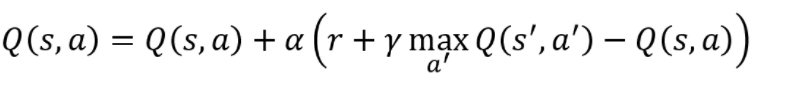

In [14]:
import numpy as np

In [13]:
Q = {}
for s in range(env.observation_space.n):
    for a in range(env.action_space.n):
        Q[(s,a)] = 0.0


In [17]:
for i in range(num_episodes):

  s = env.reset()

  for t in range(num_timesteps):

    a = epsilon_greedy(a, epsilon)
    s_, r, done, _ = env.step(a)

    # Now here we select action based on greedy approach, instead of epsilon-greedy as in SARSA

    a_=np.argmax([Q[(s_,a)] for a in range(env.action_space.n)])

    Q[(s,a)] += alpha * (r + gamma * Q[(s_, a_)] - Q[(s,a)])

    s = s_

    if done:
      break


In [18]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

Q

<IPython.core.display.Javascript object>

{(0, 0): 0.3795159815531466,
 (0, 1): 0.4167929800168225,
 (0, 2): 0.37039052952897306,
 (0, 3): 0.3694521333458708,
 (1, 0): 0.06097032934435853,
 (1, 1): 0.06153250393005405,
 (1, 2): 0.006878677594615162,
 (1, 3): 0.3882529968197157,
 (2, 0): 0.4637311050691653,
 (2, 1): 0.4188594980187723,
 (2, 2): 0.435474862484415,
 (2, 3): 0.3614848433047821,
 (3, 0): 0.009094756781144575,
 (3, 1): 0.4656797148159976,
 (3, 2): 0.04426266323222039,
 (3, 3): 0.36733079277130776,
 (4, 0): 0.39037742174993106,
 (4, 1): 0.4708494526028576,
 (4, 2): 0.07807474256011065,
 (4, 3): 0.44125233237006584,
 (5, 0): 0.0,
 (5, 1): 0.0,
 (5, 2): 0.0,
 (5, 3): 0.0,
 (6, 0): 0.5379883108024313,
 (6, 1): 5.919241156988349e-05,
 (6, 2): 0.3786427904712803,
 (6, 3): 0.006069454654330994,
 (7, 0): 0.0,
 (7, 1): 0.0,
 (7, 2): 0.0,
 (7, 3): 0.0,
 (8, 0): 0.40028226338190004,
 (8, 1): 0.6018354476751998,
 (8, 2): 0.5414979036261254,
 (8, 3): 0.6777517789917845,
 (9, 0): 0.6139555317343343,
 (9, 1): 0.6441520825762678,
 